# 📷 Cifar-10 Image Classification

El conjunto de datos `CIFAR-10` consta de `60000` imágenes en color `32x32` en `10` clases, con `6000` imágenes por clase. Hay "50000" imágenes de entrenamiento y "10000" imágenes de prueba.

# 🔬 Definición del problema:

Dada una imagen, ¿podemos predecir la clase correcta de esta imagen?

Las imágenes son muy pequeñas (`32x32`) y al visualizarlas notarás lo difícil que es distinguirlas incluso para un humano.

En este cuaderno vamos a construir un modelo CNN que puede clasificar imágenes de varios objetos. Tenemos clase `10` de imágenes:
1. Avión
2. automóvil
3. pájaro
4. gato
5. ciervo
6. perro
7. rana
8. caballo
9. barco
10. camión

In [84]:
import pandas as pd
import numpy as np
import pickle, os, sys
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix

# 📥 Load the data

In [85]:
# Función para desempaquetar los archivos
def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

# Función para convertir los datos planos en imágenes de 32x32x3
def unpack_image(data, index):
    image = data[index].reshape(3, 32, 32).transpose(1, 2, 0)
    return image

def imgTo1D(img):
    resultado = []
    for i in img:
        for j in i:
            resultado.append(np.mean(j))
    return np.asarray(resultado).reshape(1, 32, 32).transpose(1, 2, 0)

In [86]:
# Lista para almacenar los datos
batches = []

# Update the data_dir path to the correct directory path
data_dir = os.path.join('../../01_data', 'cifar-10-batches-py')

# Cargar cada archivo en la carpeta
for filename in os.listdir(data_dir):
    if filename.startswith('data_batch'):
        file_path = os.path.join(data_dir, filename)
        print(filename)
        data_dict = unpickle(file_path)
        batches.append(data_dict)

# Ahora 'data' es una lista con todas las imágenes del conjunto de datos
print(f'Número total de batches procesados: {len(batches)}')

# Extraer la data y las etiquetas
data_train = np.vstack([batch[b'data'] for batch in batches])
labels_train = np.hstack([batch[b'labels'] for batch in batches])

data_batch_1
data_batch_2
data_batch_5
data_batch_4
data_batch_3
Número total de batches procesados: 5


In [87]:
# Lista para almacenar los datos
batches = []

# Update the data_dir path to the correct directory path
data_dir = os.path.join('../../01_data', 'cifar-10-batches-py')

# Cargar cada archivo en la carpeta
for filename in os.listdir(data_dir):
    if filename.startswith('data_test'):
        file_path = os.path.join(data_dir, filename)
        print(filename)
        data_dict = unpickle(file_path)
        batches.append(data_dict)

# Ahora 'data' es una lista con todas las imágenes del conjunto de datos
print(f'Número total de batches procesados: {len(batches)}')

# Extraer la data y las etiquetas
data_test = np.vstack([batch[b'data'] for batch in batches])
labels_test = np.hstack([batch[b'labels'] for batch in batches])

data_test_batch
Número total de batches procesados: 1


In [88]:
images1D_train = []
for i, img in enumerate(data_train):
    resultadoImgTo1D = imgTo1D(unpack_image(data_train, i))
    images1D_train.append(resultadoImgTo1D)
images1D_train = np.array(images1D_train)    

images1D_test = []
for i, img in enumerate(data_test):
    resultadoImgTo1D = imgTo1D(unpack_image(data_test, i))
    images1D_test.append(resultadoImgTo1D)
images1D_test = np.array(images1D_test)    

In [89]:
X_train = images1D_train
X_test = images1D_test
y_train = np.array(labels_train)
y_test = np.array(labels_test)

In [90]:
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (50000, 32, 32, 1)
y_train shape: (50000,)
X_test shape: (10000, 32, 32, 1)
y_test shape: (10000,)


# 🖼 Data Visualization

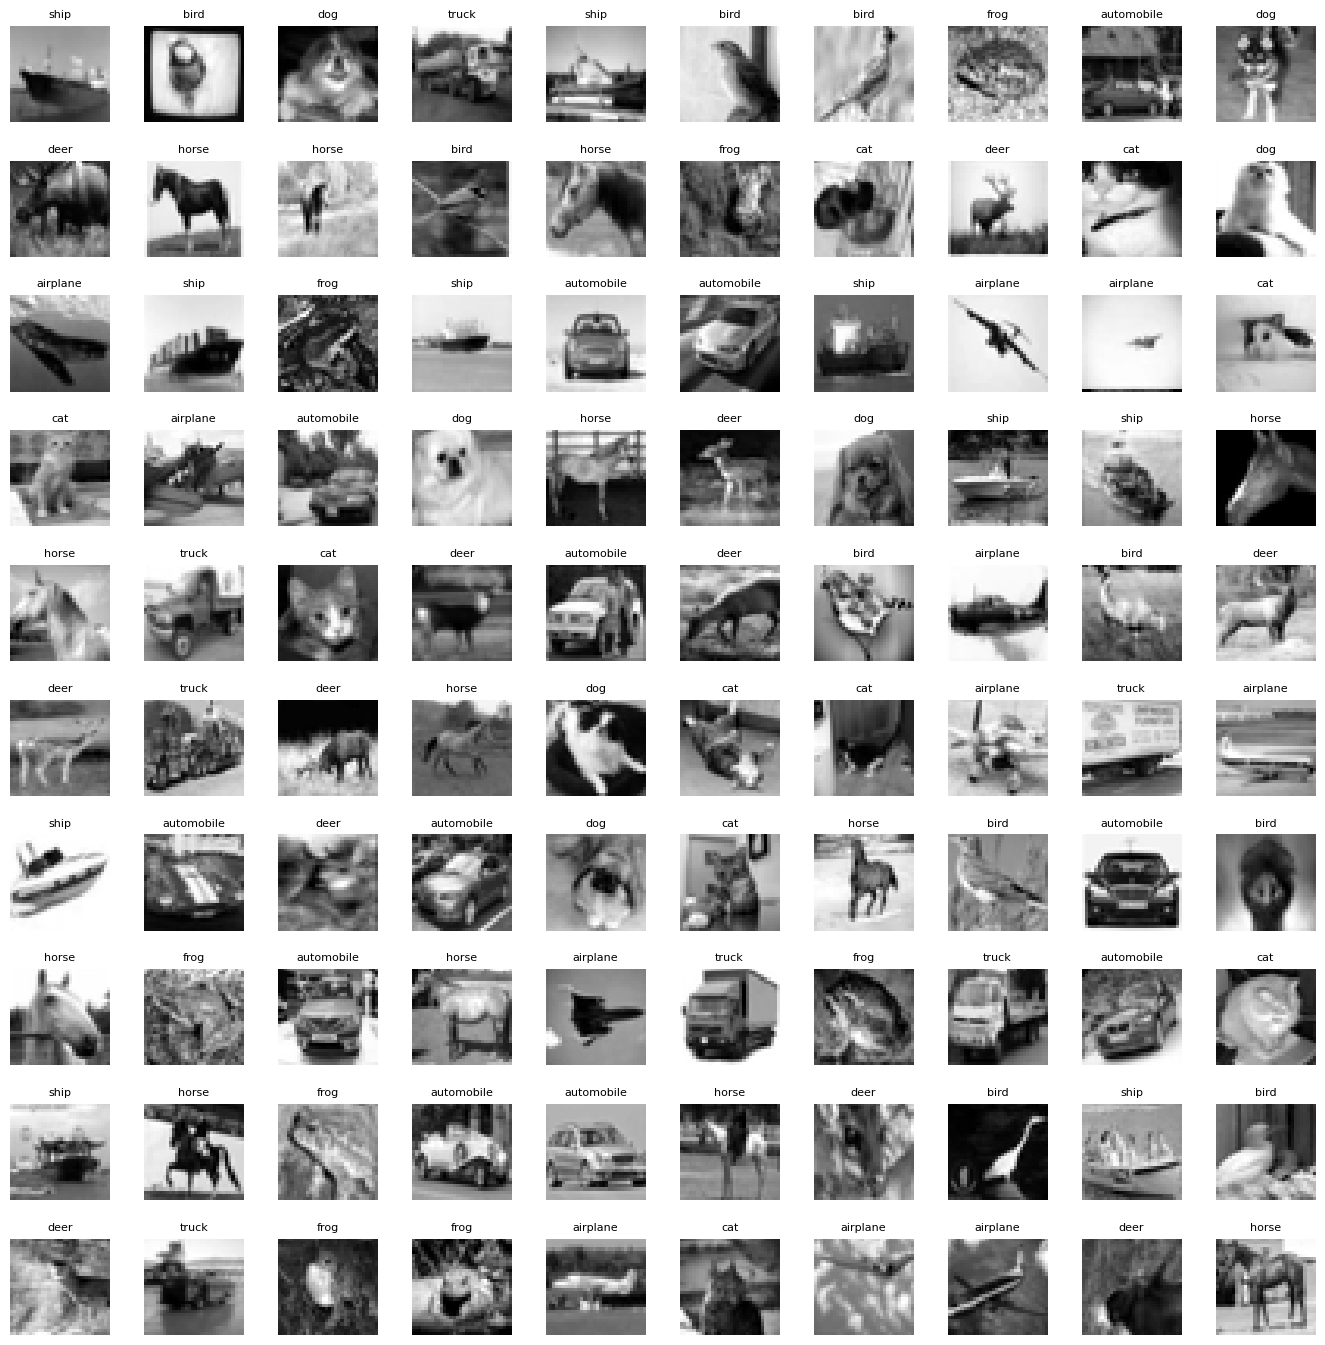

In [91]:
# Define the labels of the dataset
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
          'dog', 'frog', 'horse', 'ship', 'truck']

# Let's view more images in a grid format
# Define the dimensions of the plot grid 
W_grid = 10
L_grid = 10

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))

axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array

n_train = len(X_train) # get the length of the train dataset

# Select a random number from 0 to n_train
for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables 

    # Select a random number
    index = np.random.randint(0, n_train)
    # read and display an image with the selected index    
    axes[i].imshow(X_train[index,1:], cmap='gray')
    label_index = int(y_train[index])
    axes[i].set_title(labels[label_index], fontsize = 8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

Text(0.5, 1.0, 'Class distribution in training set')

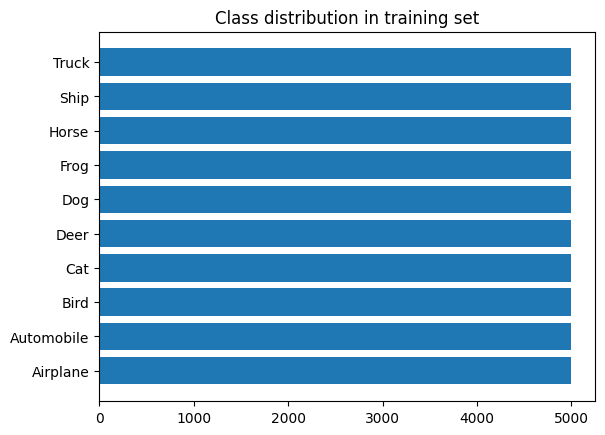

In [92]:
classes_name = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

classes, counts = np.unique(y_train, return_counts=True)
plt.barh(classes_name, counts)
plt.title('Class distribution in training set')

Text(0.5, 1.0, 'Class distribution in testing set')

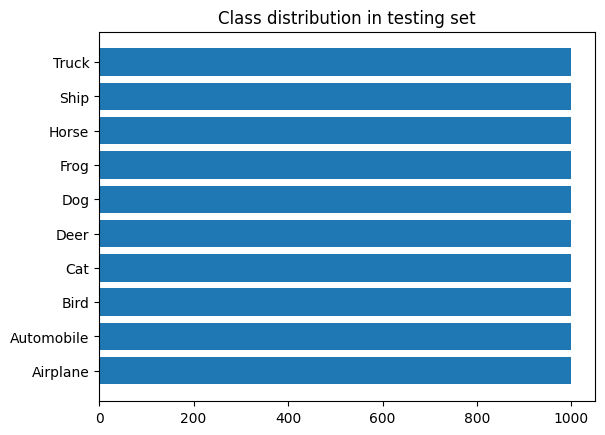

In [93]:
classes, counts = np.unique(y_test, return_counts=True)
plt.barh(classes_name, counts)
plt.title('Class distribution in testing set')

The class are equally distributed

# 🔄 Data Preprocessing

In [94]:
# Scale the data
#X_train = X_train / 255.0
#X_test = X_test / 255.0

# Transform target variable into one-hotencoding
y_cat_train = to_categorical(y_train, 10)
y_cat_test = to_categorical(y_test, 10)

In [95]:
y_cat_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

# 🤖 Model Building

In [96]:
INPUT_SHAPE = (32, 32, 1)
KERNEL_SIZE = (3, 3)
model = Sequential()

# Convolutional Layer
model.add(Conv2D(filters=32, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=32, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same'))
model.add(BatchNormalization())
# Pooling layer
model.add(MaxPool2D(pool_size=(2, 2)))
# Dropout layers
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=64, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=128, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=128, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
# model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))

METRICS = [
    'accuracy',
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall')
]
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=METRICS)

/Users/santiagomunera/miniconda3/envs/ml/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [97]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 32, 32, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,29

 Total params: 551,786 (2.10 MB)

 Trainable params: 550,890 (2.10 MB)

 Non-trainable params: 896 (3.50 KB)

## Early Stopping

In [98]:
early_stop = EarlyStopping(monitor='val_loss', patience=2)

## Data Augmentations

In [99]:
batch_size = 32
data_generator = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
train_generator = data_generator.flow(X_train, y_cat_train, batch_size)
steps_per_epoch = X_train.shape[0] // batch_size

r = model.fit(train_generator, 
              epochs=50,
              steps_per_epoch=steps_per_epoch,
              validation_data=(X_test, y_cat_test), 
#               callbacks=[early_stop],
#               batch_size=batch_size,
             )

Epoch 1/50
   1/1562 ━━━━━━━━━━━━━━━━━━━━ 54:08 2s/step - accuracy: 0.0625 - loss: 4.5078 - precision: 0.1000 - recall: 0.0625

/Users/santiagomunera/miniconda3/envs/ml/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1562/1562 ━━━━━━━━━━━━━━━━━━━━ 133s 84ms/step - accuracy: 0.2913 - loss: 1.9859 - precision: 0.4778 - recall: 0.0798 - val_accuracy: 0.5307 - val_loss: 1.3601 - val_precision: 0.6593 - val_recall: 0.3770
Epoch 2/50
   1/1562 ━━━━━━━━━━━━━━━━━━━━ 1:57 75ms/step - accuracy: 0.6250 - loss: 1.2649 - precision: 0.7333 - recall: 0.3438

2024-05-18 12:11:09.592582: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/Users/santiagomunera/miniconda3/envs/ml/lib/python3.12/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


1562/1562 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6250 - loss: 1.2649 - precision: 0.7333 - recall: 0.3438 - val_accuracy: 0.5241 - val_loss: 1.3935 - val_precision: 0.6461 - val_recall: 0.3723
Epoch 3/50
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 138s 88ms/step - accuracy: 0.5214 - loss: 1.3525 - precision: 0.7116 - recall: 0.3360 - val_accuracy: 0.6334 - val_loss: 1.0489 - val_precision: 0.7933 - val_recall: 0.5015
Epoch 4/50
   1/1562 ━━━━━━━━━━━━━━━━━━━━ 2:13 86ms/step - accuracy: 0.6875 - loss: 1.0078 - precision: 0.7619 - recall: 0.5000

2024-05-18 12:13:33.990691: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


1562/1562 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.6875 - loss: 1.0078 - precision: 0.7619 - recall: 0.5000 - val_accuracy: 0.6355 - val_loss: 1.0462 - val_precision: 0.7959 - val_recall: 0.5025
Epoch 5/50
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 140s 90ms/step - accuracy: 0.6021 - loss: 1.1553 - precision: 0.7606 - recall: 0.4507 - val_accuracy: 0.6976 - val_loss: 0.8943 - val_precision: 0.8078 - val_recall: 0.5964
Epoch 6/50
   1/1562 ━━━━━━━━━━━━━━━━━━━━ 2:35 99ms/step - accuracy: 0.6250 - loss: 1.1077 - precision: 0.7778 - recall: 0.4375

2024-05-18 12:16:01.078321: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


1562/1562 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6250 - loss: 1.1077 - precision: 0.7778 - recall: 0.4375 - val_accuracy: 0.6970 - val_loss: 0.8936 - val_precision: 0.8056 - val_recall: 0.5967
Epoch 7/50
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 131s 84ms/step - accuracy: 0.6494 - loss: 1.0310 - precision: 0.7891 - recall: 0.5199 - val_accuracy: 0.7114 - val_loss: 0.8552 - val_precision: 0.8096 - val_recall: 0.6162
Epoch 8/50
   1/1562 ━━━━━━━━━━━━━━━━━━━━ 2:01 78ms/step - accuracy: 0.7500 - loss: 0.7124 - precision: 0.9231 - recall: 0.7500

2024-05-18 12:18:19.027650: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


1562/1562 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7500 - loss: 0.7124 - precision: 0.9231 - recall: 0.7500 - val_accuracy: 0.7111 - val_loss: 0.8552 - val_precision: 0.8086 - val_recall: 0.6161
Epoch 9/50
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 129s 83ms/step - accuracy: 0.6743 - loss: 0.9585 - precision: 0.7954 - recall: 0.5548 - val_accuracy: 0.7390 - val_loss: 0.7655 - val_precision: 0.8346 - val_recall: 0.6607
Epoch 10/50
   1/1562 ━━━━━━━━━━━━━━━━━━━━ 2:12 85ms/step - accuracy: 0.6562 - loss: 0.8626 - precision: 0.7619 - recall: 0.5000

2024-05-18 12:20:35.155396: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


1562/1562 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6562 - loss: 0.8626 - precision: 0.7619 - recall: 0.5000 - val_accuracy: 0.7412 - val_loss: 0.7598 - val_precision: 0.8360 - val_recall: 0.6626
Epoch 11/50
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 130s 83ms/step - accuracy: 0.6974 - loss: 0.8945 - precision: 0.8134 - recall: 0.5932 - val_accuracy: 0.7480 - val_loss: 0.7493 - val_precision: 0.8366 - val_recall: 0.6623
Epoch 12/50
   1/1562 ━━━━━━━━━━━━━━━━━━━━ 2:02 78ms/step - accuracy: 0.8438 - loss: 0.5044 - precision: 0.9286 - recall: 0.8125

2024-05-18 12:22:51.311259: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


1562/1562 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8438 - loss: 0.5044 - precision: 0.9286 - recall: 0.8125 - val_accuracy: 0.7460 - val_loss: 0.7542 - val_precision: 0.8374 - val_recall: 0.6594
Epoch 13/50
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 129s 83ms/step - accuracy: 0.7153 - loss: 0.8444 - precision: 0.8248 - recall: 0.6169 - val_accuracy: 0.7228 - val_loss: 0.8313 - val_precision: 0.8008 - val_recall: 0.6476
Epoch 14/50
   1/1562 ━━━━━━━━━━━━━━━━━━━━ 2:07 82ms/step - accuracy: 0.7188 - loss: 0.7717 - precision: 0.8333 - recall: 0.6250

2024-05-18 12:25:06.597321: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


1562/1562 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7188 - loss: 0.7717 - precision: 0.8333 - recall: 0.6250 - val_accuracy: 0.7281 - val_loss: 0.8171 - val_precision: 0.8058 - val_recall: 0.6533
Epoch 15/50
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 130s 83ms/step - accuracy: 0.7297 - loss: 0.8076 - precision: 0.8316 - recall: 0.6381 - val_accuracy: 0.7263 - val_loss: 0.8441 - val_precision: 0.8115 - val_recall: 0.6582
Epoch 16/50
   1/1562 ━━━━━━━━━━━━━━━━━━━━ 2:21 91ms/step - accuracy: 0.8750 - loss: 0.5873 - precision: 0.9565 - recall: 0.6875

2024-05-18 12:27:23.064780: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


1562/1562 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8750 - loss: 0.5873 - precision: 0.9565 - recall: 0.6875 - val_accuracy: 0.7218 - val_loss: 0.8542 - val_precision: 0.8096 - val_recall: 0.6534
Epoch 17/50
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 138s 88ms/step - accuracy: 0.7424 - loss: 0.7581 - precision: 0.8411 - recall: 0.6570 - val_accuracy: 0.7363 - val_loss: 0.8086 - val_precision: 0.8136 - val_recall: 0.6650
Epoch 18/50
   1/1562 ━━━━━━━━━━━━━━━━━━━━ 2:00 77ms/step - accuracy: 0.8125 - loss: 0.6047 - precision: 0.8214 - recall: 0.7188

2024-05-18 12:29:47.057728: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


1562/1562 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8125 - loss: 0.6047 - precision: 0.8214 - recall: 0.7188 - val_accuracy: 0.7334 - val_loss: 0.8154 - val_precision: 0.8119 - val_recall: 0.6623
Epoch 19/50
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 129s 83ms/step - accuracy: 0.7512 - loss: 0.7367 - precision: 0.8451 - recall: 0.6708 - val_accuracy: 0.7846 - val_loss: 0.6336 - val_precision: 0.8560 - val_recall: 0.7233
Epoch 20/50
   1/1562 ━━━━━━━━━━━━━━━━━━━━ 2:02 78ms/step - accuracy: 0.5625 - loss: 1.3206 - precision: 0.6818 - recall: 0.4688

2024-05-18 12:32:02.289703: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


1562/1562 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5625 - loss: 1.3206 - precision: 0.6818 - recall: 0.4688 - val_accuracy: 0.7798 - val_loss: 0.6414 - val_precision: 0.8529 - val_recall: 0.7198
Epoch 21/50
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 128s 82ms/step - accuracy: 0.7526 - loss: 0.7344 - precision: 0.8410 - recall: 0.6703 - val_accuracy: 0.7778 - val_loss: 0.6783 - val_precision: 0.8366 - val_recall: 0.7228
Epoch 22/50
   1/1562 ━━━━━━━━━━━━━━━━━━━━ 2:10 83ms/step - accuracy: 0.9375 - loss: 0.3202 - precision: 1.0000 - recall: 0.8750

2024-05-18 12:34:16.982172: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


1562/1562 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9375 - loss: 0.3202 - precision: 1.0000 - recall: 0.8750 - val_accuracy: 0.7741 - val_loss: 0.6835 - val_precision: 0.8353 - val_recall: 0.7225
Epoch 23/50
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 129s 83ms/step - accuracy: 0.7662 - loss: 0.7030 - precision: 0.8527 - recall: 0.6881 - val_accuracy: 0.7869 - val_loss: 0.6490 - val_precision: 0.8598 - val_recall: 0.7219
Epoch 24/50
   1/1562 ━━━━━━━━━━━━━━━━━━━━ 2:08 82ms/step - accuracy: 0.8125 - loss: 0.6466 - precision: 0.9200 - recall: 0.7188

2024-05-18 12:36:32.549234: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


1562/1562 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8125 - loss: 0.6466 - precision: 0.9200 - recall: 0.7188 - val_accuracy: 0.7900 - val_loss: 0.6415 - val_precision: 0.8636 - val_recall: 0.7231
Epoch 25/50
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 131s 84ms/step - accuracy: 0.7684 - loss: 0.6824 - precision: 0.8521 - recall: 0.6933 - val_accuracy: 0.8026 - val_loss: 0.5819 - val_precision: 0.8619 - val_recall: 0.7456
Epoch 26/50
   1/1562 ━━━━━━━━━━━━━━━━━━━━ 2:11 84ms/step - accuracy: 0.7500 - loss: 0.7092 - precision: 0.8571 - recall: 0.7500

2024-05-18 12:38:49.920435: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


1562/1562 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7500 - loss: 0.7092 - precision: 0.8571 - recall: 0.7500 - val_accuracy: 0.8023 - val_loss: 0.5822 - val_precision: 0.8618 - val_recall: 0.7472
Epoch 27/50
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 147s 94ms/step - accuracy: 0.7778 - loss: 0.6584 - precision: 0.8549 - recall: 0.7076 - val_accuracy: 0.8063 - val_loss: 0.5807 - val_precision: 0.8768 - val_recall: 0.7392
Epoch 28/50
   1/1562 ━━━━━━━━━━━━━━━━━━━━ 3:28 134ms/step - accuracy: 0.9062 - loss: 0.4486 - precision: 0.9310 - recall: 0.8438

2024-05-18 12:41:23.795567: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


1562/1562 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9062 - loss: 0.4486 - precision: 0.9310 - recall: 0.8438 - val_accuracy: 0.8094 - val_loss: 0.5731 - val_precision: 0.8776 - val_recall: 0.7432
Epoch 29/50
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 139s 89ms/step - accuracy: 0.7823 - loss: 0.6466 - precision: 0.8605 - recall: 0.7110 - val_accuracy: 0.8091 - val_loss: 0.5806 - val_precision: 0.8675 - val_recall: 0.7520
Epoch 30/50
   1/1562 ━━━━━━━━━━━━━━━━━━━━ 2:51 110ms/step - accuracy: 0.9375 - loss: 0.3237 - precision: 1.0000 - recall: 0.8438

2024-05-18 12:43:49.034752: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


1562/1562 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9375 - loss: 0.3237 - precision: 1.0000 - recall: 0.8438 - val_accuracy: 0.8080 - val_loss: 0.5820 - val_precision: 0.8680 - val_recall: 0.7519
Epoch 31/50
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 134s 86ms/step - accuracy: 0.7850 - loss: 0.6349 - precision: 0.8616 - recall: 0.7188 - val_accuracy: 0.7439 - val_loss: 0.8042 - val_precision: 0.8061 - val_recall: 0.6907
Epoch 32/50
   1/1562 ━━━━━━━━━━━━━━━━━━━━ 2:55 112ms/step - accuracy: 0.8438 - loss: 0.6421 - precision: 0.8800 - recall: 0.6875

2024-05-18 12:46:11.864513: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


1562/1562 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8438 - loss: 0.6421 - precision: 0.8800 - recall: 0.6875 - val_accuracy: 0.7482 - val_loss: 0.7912 - val_precision: 0.8093 - val_recall: 0.6958
Epoch 33/50
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 130s 83ms/step - accuracy: 0.7927 - loss: 0.6110 - precision: 0.8630 - recall: 0.7281 - val_accuracy: 0.8083 - val_loss: 0.5680 - val_precision: 0.8679 - val_recall: 0.7616
Epoch 34/50
   1/1562 ━━━━━━━━━━━━━━━━━━━━ 2:09 83ms/step - accuracy: 0.7812 - loss: 0.5668 - precision: 0.8519 - recall: 0.7188

2024-05-18 12:48:28.234427: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


1562/1562 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7812 - loss: 0.5668 - precision: 0.8519 - recall: 0.7188 - val_accuracy: 0.8067 - val_loss: 0.5746 - val_precision: 0.8665 - val_recall: 0.7588
Epoch 35/50
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 127s 81ms/step - accuracy: 0.7958 - loss: 0.5992 - precision: 0.8667 - recall: 0.7336 - val_accuracy: 0.8115 - val_loss: 0.5704 - val_precision: 0.8635 - val_recall: 0.7632
Epoch 36/50
   1/1562 ━━━━━━━━━━━━━━━━━━━━ 1:54 73ms/step - accuracy: 0.8125 - loss: 0.6384 - precision: 0.8929 - recall: 0.7812

2024-05-18 12:50:41.382504: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


1562/1562 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8125 - loss: 0.6384 - precision: 0.8929 - recall: 0.7812 - val_accuracy: 0.8110 - val_loss: 0.5704 - val_precision: 0.8640 - val_recall: 0.7631
Epoch 37/50
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 131s 84ms/step - accuracy: 0.8024 - loss: 0.5874 - precision: 0.8717 - recall: 0.7392 - val_accuracy: 0.8319 - val_loss: 0.5042 - val_precision: 0.8865 - val_recall: 0.7867
Epoch 38/50
   1/1562 ━━━━━━━━━━━━━━━━━━━━ 2:03 79ms/step - accuracy: 0.6250 - loss: 0.8502 - precision: 0.6800 - recall: 0.5312

2024-05-18 12:52:58.122310: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


1562/1562 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6250 - loss: 0.8502 - precision: 0.6800 - recall: 0.5312 - val_accuracy: 0.8322 - val_loss: 0.5031 - val_precision: 0.8862 - val_recall: 0.7867
Epoch 39/50
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 138s 88ms/step - accuracy: 0.8034 - loss: 0.5807 - precision: 0.8728 - recall: 0.7470 - val_accuracy: 0.8169 - val_loss: 0.5492 - val_precision: 0.8787 - val_recall: 0.7580
Epoch 40/50
   1/1562 ━━━━━━━━━━━━━━━━━━━━ 2:29 96ms/step - accuracy: 0.7500 - loss: 0.7931 - precision: 0.9000 - recall: 0.5625

2024-05-18 12:55:22.750579: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


1562/1562 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7500 - loss: 0.7931 - precision: 0.9000 - recall: 0.5625 - val_accuracy: 0.8177 - val_loss: 0.5481 - val_precision: 0.8791 - val_recall: 0.7585
Epoch 41/50
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 130s 83ms/step - accuracy: 0.8050 - loss: 0.5705 - precision: 0.8745 - recall: 0.7480 - val_accuracy: 0.8127 - val_loss: 0.5753 - val_precision: 0.8590 - val_recall: 0.7722
Epoch 42/50
   1/1562 ━━━━━━━━━━━━━━━━━━━━ 2:01 78ms/step - accuracy: 0.8125 - loss: 0.7920 - precision: 0.9167 - recall: 0.6875

2024-05-18 12:57:39.180896: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


1562/1562 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8125 - loss: 0.7920 - precision: 0.9167 - recall: 0.6875 - val_accuracy: 0.8138 - val_loss: 0.5709 - val_precision: 0.8612 - val_recall: 0.7721
Epoch 43/50
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 130s 83ms/step - accuracy: 0.8086 - loss: 0.5645 - precision: 0.8732 - recall: 0.7505 - val_accuracy: 0.8094 - val_loss: 0.5935 - val_precision: 0.8555 - val_recall: 0.7628
Epoch 44/50
   1/1562 ━━━━━━━━━━━━━━━━━━━━ 2:01 78ms/step - accuracy: 0.9062 - loss: 0.2922 - precision: 0.9667 - recall: 0.9062

2024-05-18 12:59:55.948217: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


1562/1562 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9062 - loss: 0.2922 - precision: 0.9667 - recall: 0.9062 - val_accuracy: 0.8086 - val_loss: 0.5939 - val_precision: 0.8564 - val_recall: 0.7626
Epoch 45/50
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 130s 83ms/step - accuracy: 0.8088 - loss: 0.5583 - precision: 0.8740 - recall: 0.7545 - val_accuracy: 0.8316 - val_loss: 0.4970 - val_precision: 0.8820 - val_recall: 0.7910
Epoch 46/50
   1/1562 ━━━━━━━━━━━━━━━━━━━━ 1:58 76ms/step - accuracy: 0.7812 - loss: 0.4846 - precision: 0.8800 - recall: 0.6875

2024-05-18 13:02:12.957943: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


1562/1562 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7812 - loss: 0.4846 - precision: 0.8800 - recall: 0.6875 - val_accuracy: 0.8315 - val_loss: 0.4953 - val_precision: 0.8823 - val_recall: 0.7920
Epoch 47/50
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 129s 83ms/step - accuracy: 0.8136 - loss: 0.5473 - precision: 0.8790 - recall: 0.7572 - val_accuracy: 0.8224 - val_loss: 0.5345 - val_precision: 0.8701 - val_recall: 0.7793
Epoch 48/50
   1/1562 ━━━━━━━━━━━━━━━━━━━━ 1:49 70ms/step - accuracy: 0.8438 - loss: 0.5101 - precision: 0.9200 - recall: 0.7188

2024-05-18 13:04:28.264281: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


1562/1562 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8438 - loss: 0.5101 - precision: 0.9200 - recall: 0.7188 - val_accuracy: 0.8227 - val_loss: 0.5323 - val_precision: 0.8721 - val_recall: 0.7808
Epoch 49/50
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 127s 81ms/step - accuracy: 0.8180 - loss: 0.5366 - precision: 0.8794 - recall: 0.7651 - val_accuracy: 0.8326 - val_loss: 0.5012 - val_precision: 0.8800 - val_recall: 0.7975
Epoch 50/50
   1/1562 ━━━━━━━━━━━━━━━━━━━━ 1:52 72ms/step - accuracy: 0.9062 - loss: 0.3310 - precision: 0.9655 - recall: 0.8750

2024-05-18 13:06:41.182639: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


1562/1562 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9062 - loss: 0.3310 - precision: 0.9655 - recall: 0.8750 - val_accuracy: 0.8340 - val_loss: 0.4988 - val_precision: 0.8799 - val_recall: 0.7980


# 📊 Model Evaluation

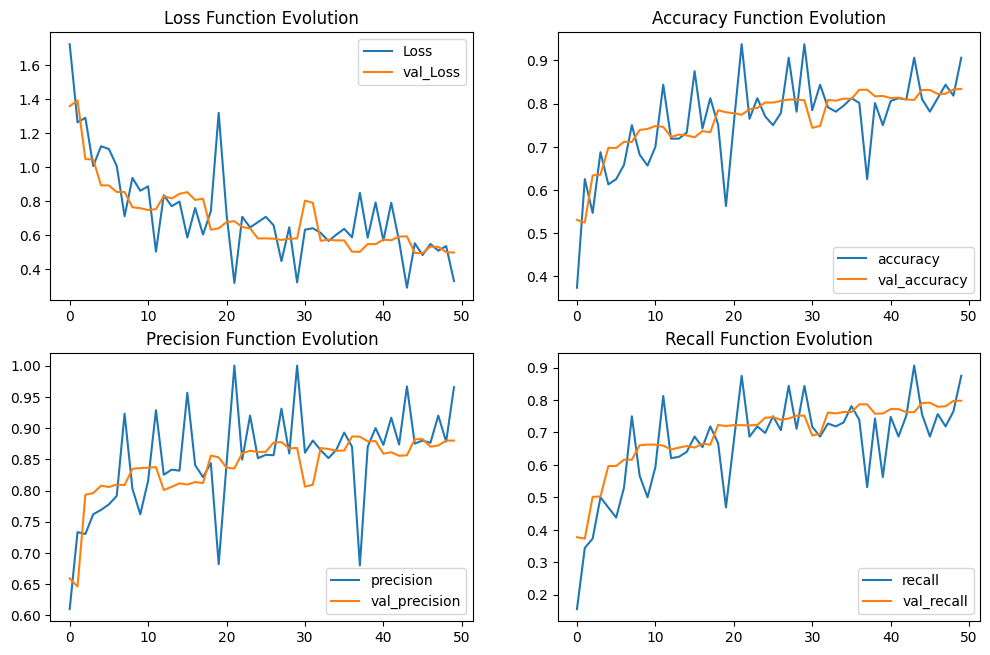

In [100]:
plt.figure(figsize=(12, 16))

plt.subplot(4, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='val_Loss')
plt.title('Loss Function Evolution')
plt.legend()

plt.subplot(4, 2, 2)
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.title('Accuracy Function Evolution')
plt.legend()

plt.subplot(4, 2, 3)
plt.plot(r.history['precision'], label='precision')
plt.plot(r.history['val_precision'], label='val_precision')
plt.title('Precision Function Evolution')
plt.legend()

plt.subplot(4, 2, 4)
plt.plot(r.history['recall'], label='recall')
plt.plot(r.history['val_recall'], label='val_recall')
plt.title('Recall Function Evolution')
plt.legend()

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - accuracy: 0.8346 - loss: 0.5099 - precision: 0.8791 - recall: 0.7964
Test Accuracy : 83.40%
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step


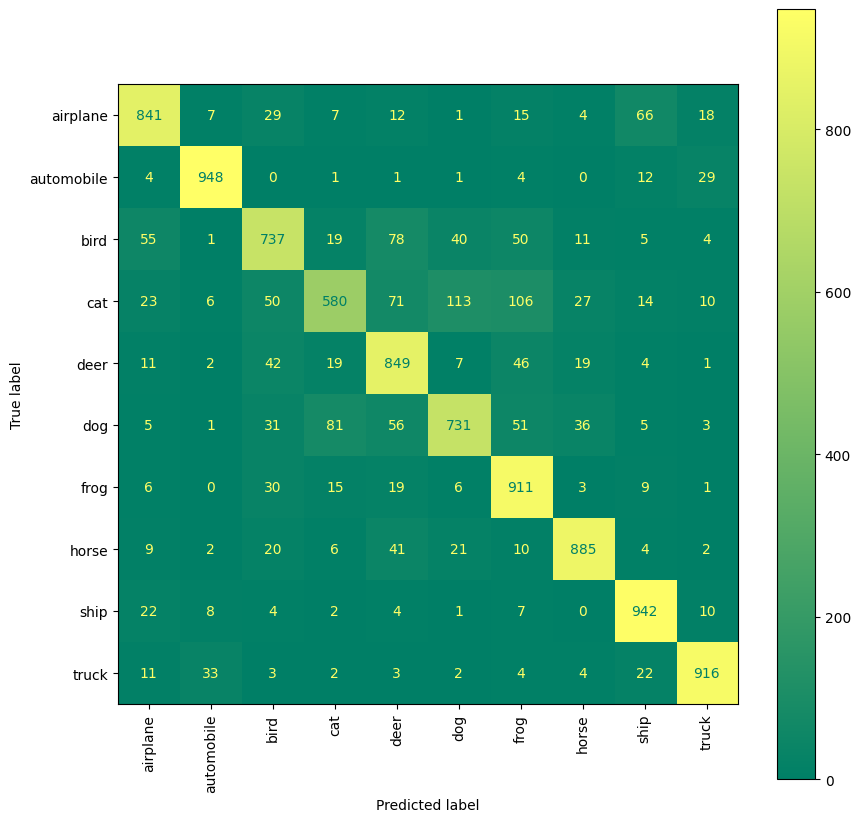

In [101]:
evaluation = model.evaluate(X_test, y_cat_test)
print(f'Test Accuracy : {evaluation[1] * 100:.2f}%')

y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(y_test, y_pred)


disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=labels)


# NOTE: Fill all variables here with default values of the plot_confusion_matrix
fig, ax = plt.subplots(figsize=(10, 10))
disp = disp.plot(xticks_rotation='vertical', ax=ax,cmap='summer')

plt.show()

In [102]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.84      0.85      1000
           1       0.94      0.95      0.94      1000
           2       0.78      0.74      0.76      1000
           3       0.79      0.58      0.67      1000
           4       0.75      0.85      0.80      1000
           5       0.79      0.73      0.76      1000
           6       0.76      0.91      0.83      1000
           7       0.89      0.89      0.89      1000
           8       0.87      0.94      0.90      1000
           9       0.92      0.92      0.92      1000

    accuracy                           0.83     10000
   macro avg       0.83      0.83      0.83     10000
weighted avg       0.83      0.83      0.83     10000



## Test on one image

 Image 100 is 4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
The model predict that image 100 is 4


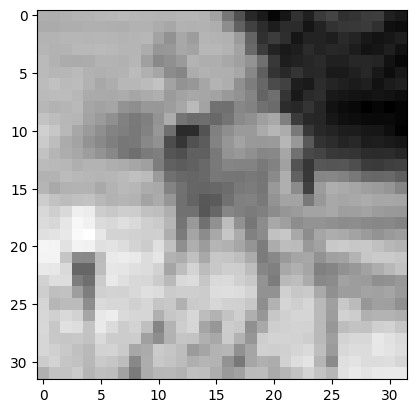

In [103]:
my_image = X_test[100]
plt.imshow(my_image, cmap='gray')

# that's a Deer
print(f" Image 100 is {y_test[100]}")

# correctly predicted as a Deer
pred_100 = np.argmax(model.predict(my_image.reshape(1, 32, 32, 1)))
print(f"The model predict that image 100 is {pred_100}")

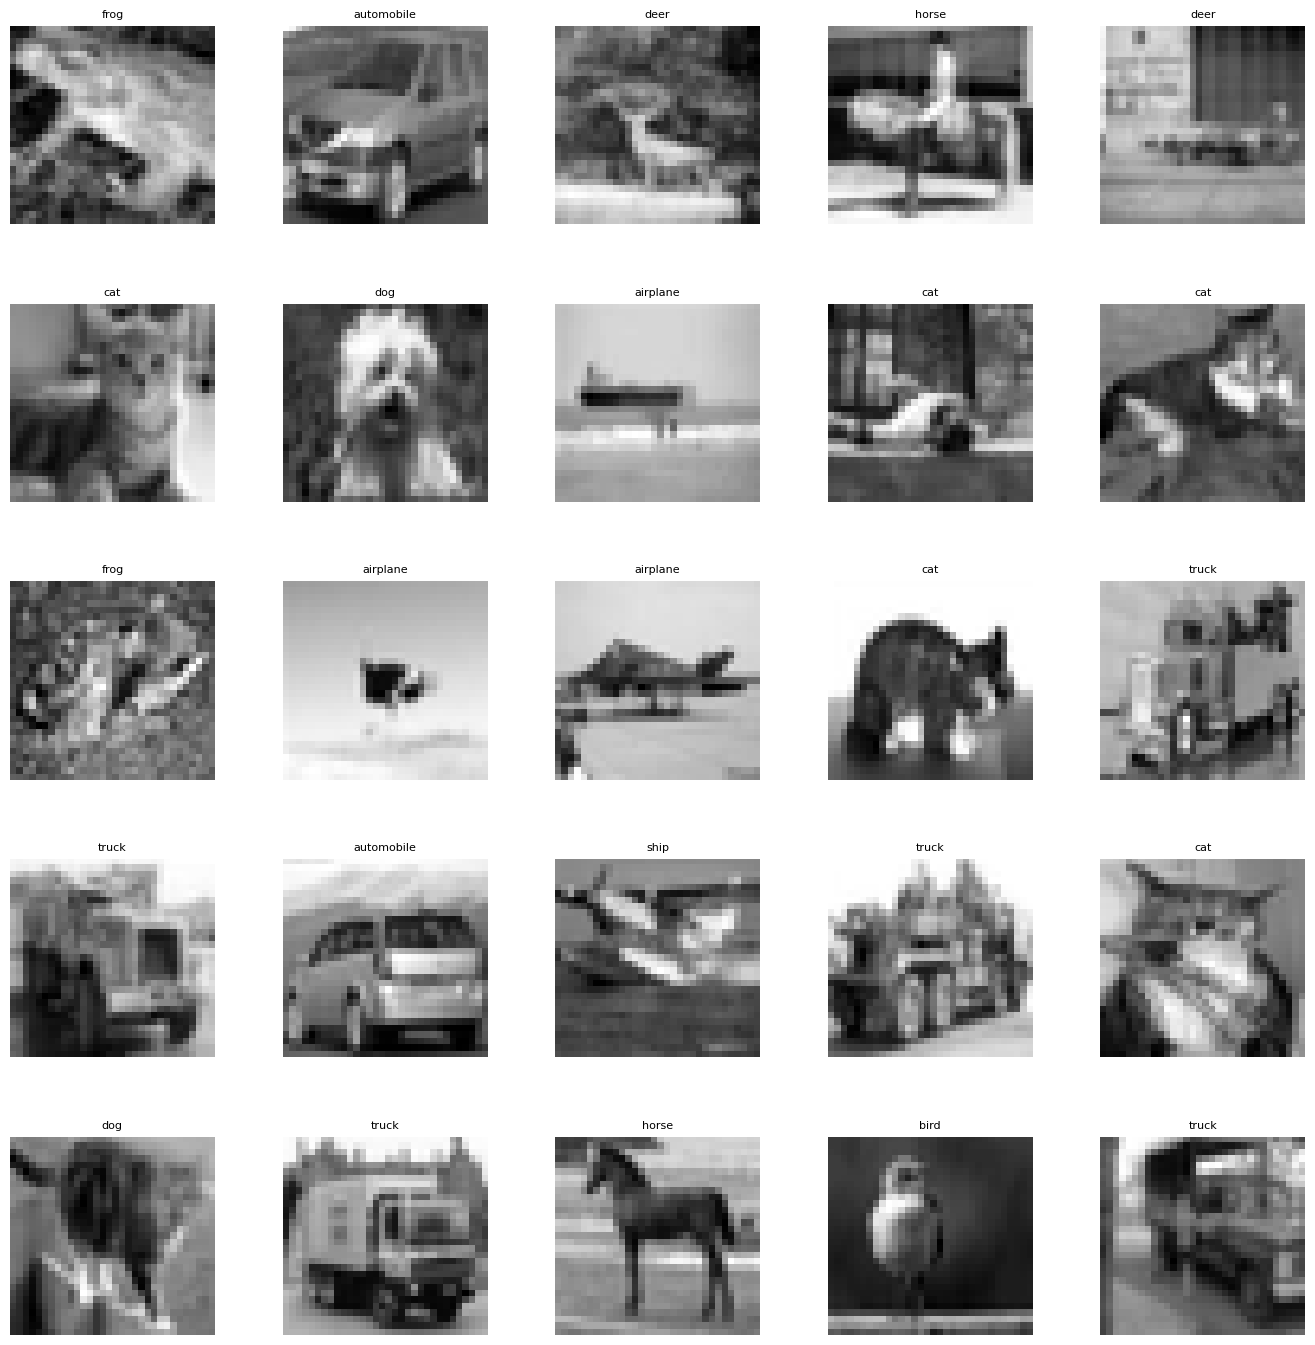

In [104]:
# Define the labels of the dataset
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
          'dog', 'frog', 'horse', 'ship', 'truck']

# Let's view more images in a grid format
# Define the dimensions of the plot grid 
W_grid = 5
L_grid = 5

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))

axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array

n_test = len(X_test) # get the length of the train dataset

# Select a random number from 0 to n_train
for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables 

    # Select a random number
    index = np.random.randint(0, n_test)
    # read and display an image with the selected index    
    axes[i].imshow(X_test[index,1:], cmap='gray')
    label_index = int(y_pred[index])
    axes[i].set_title(labels[label_index], fontsize = 8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

In [105]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel(f"{labels[int(predicted_label)]} {100*np.max(predictions_array):2.0f}% ({labels[int(true_label)]})", 
               color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, int(true_label[i])
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step


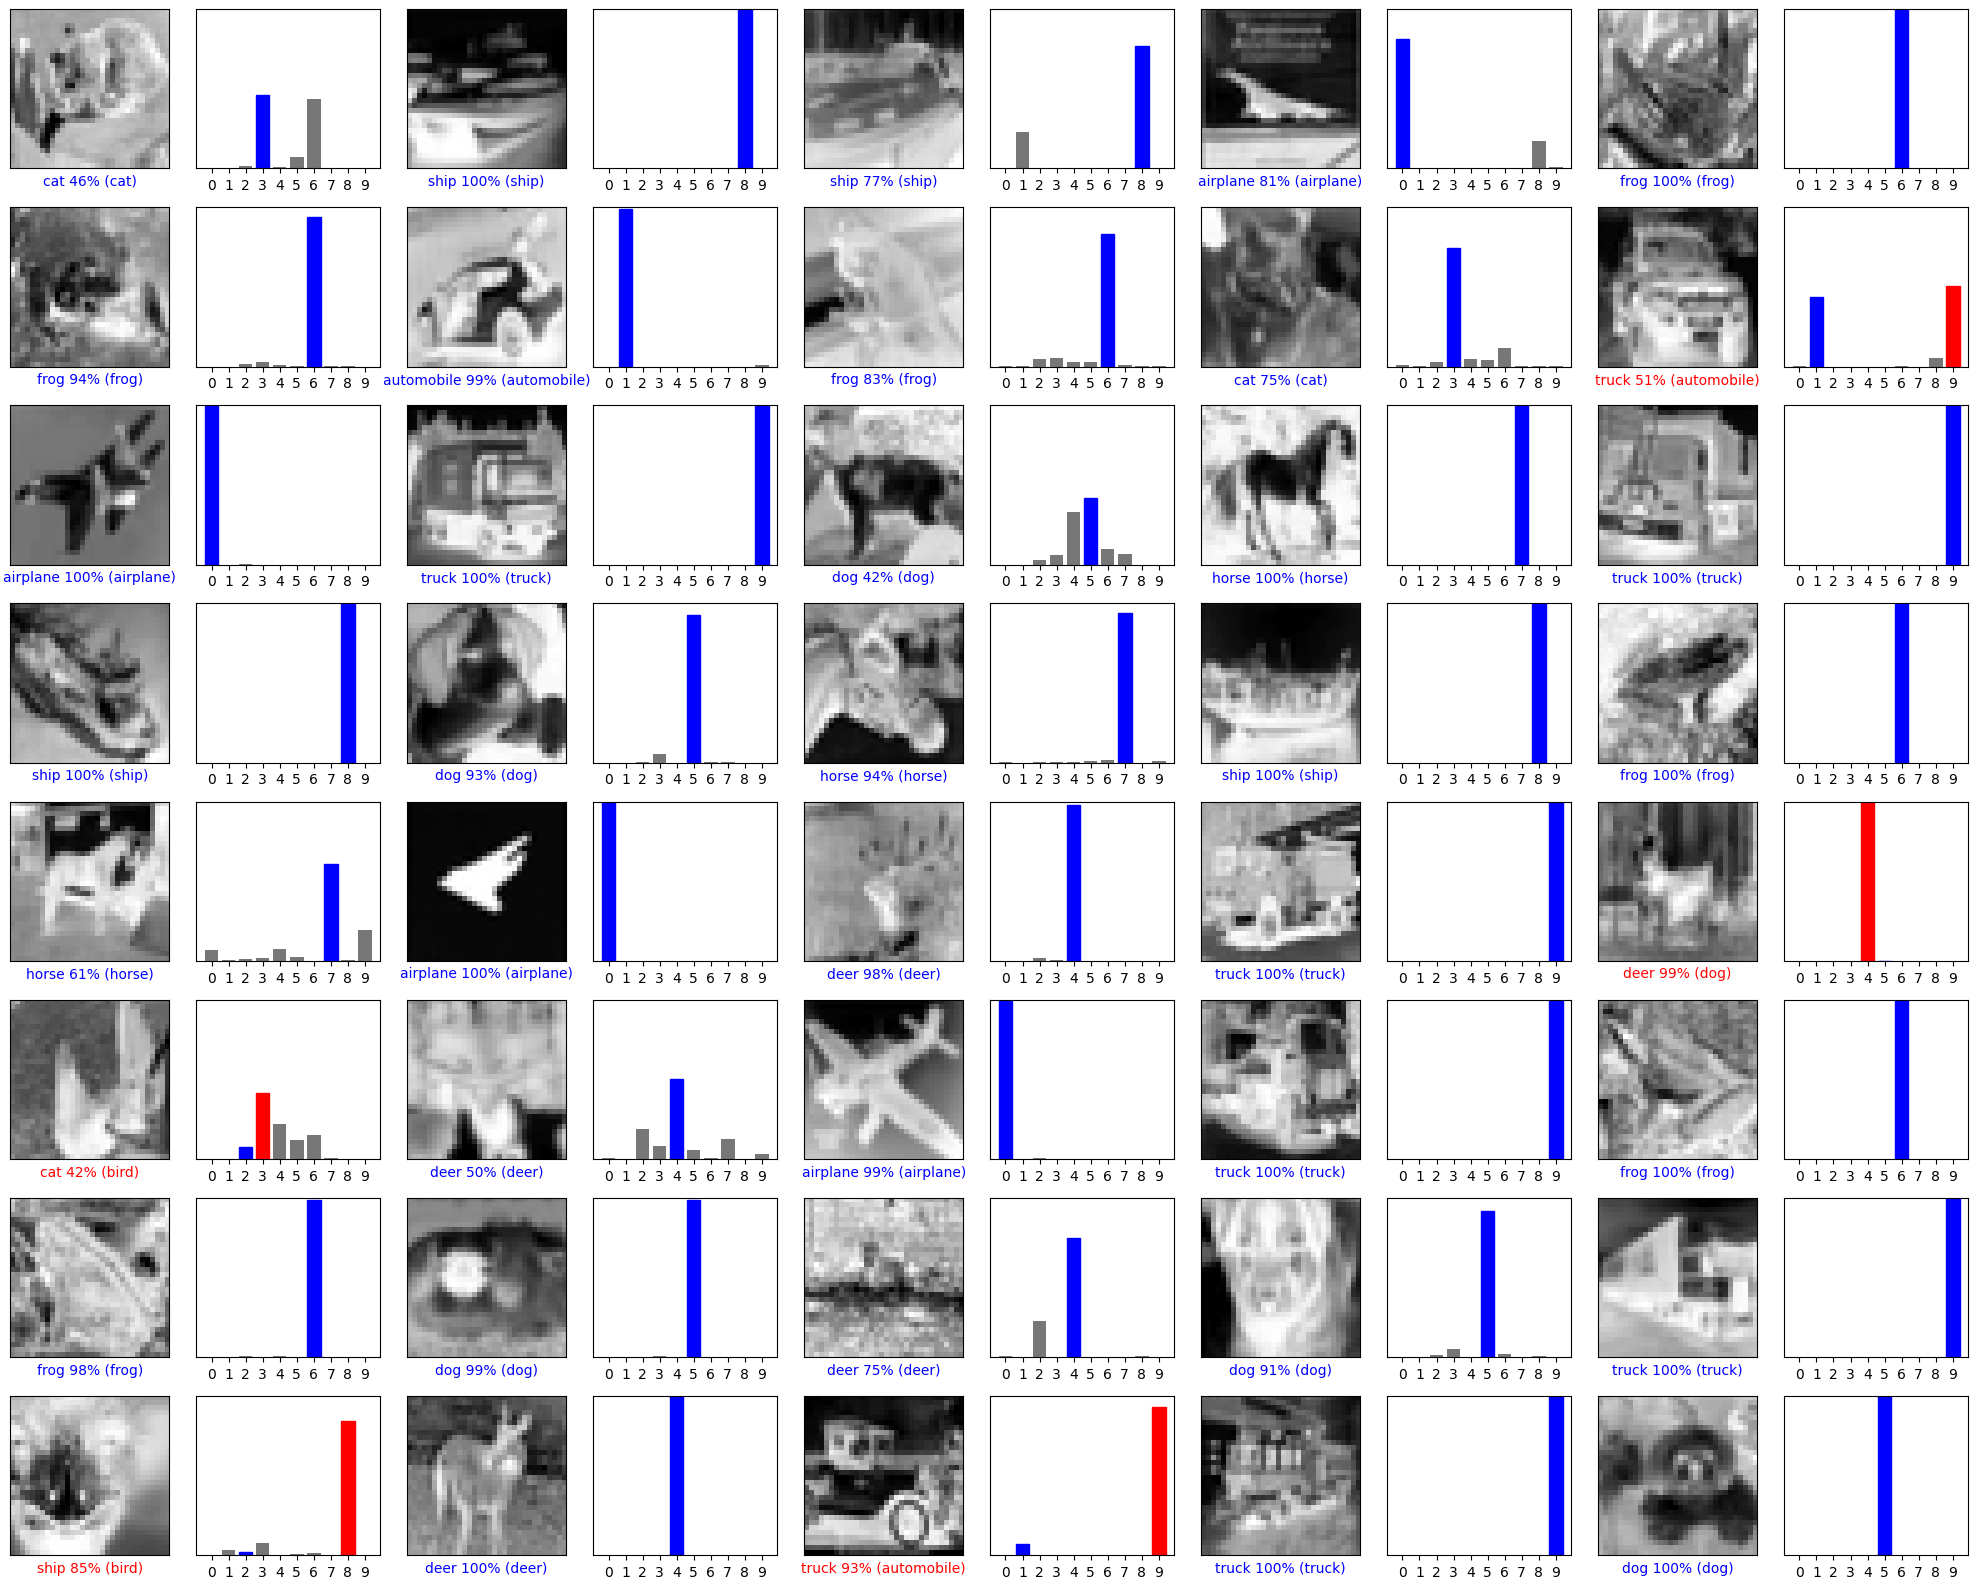

In [106]:
predictions = model.predict(X_test)

# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 8
num_cols = 5
num_images = num_rows * num_cols
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plot_image(i, predictions[i], y_test, X_test)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], y_test)
plt.tight_layout()
plt.show()

# 7. Save the models

In [107]:
from tensorflow.keras.models import load_model

model.save('bw_cnn_20_epochs.h5')